<a href="https://colab.research.google.com/github/bruno774/mestrado/blob/master/Al%C3%A9mDaPena_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

## Análise Inicial - Base antiga


In [ ]:
df = pd.read_csv('AlemDaPenaV1.csv')

In [ ]:
#Remove columns with NaN values.
df = df.dropna(axis=1)

### Columns normalization

-> Ano de referência

-> dias-multa

-> Quantidade de pena imposta na sentença (pena definitiva) - DETENÇÃO - convertido para dias

-> Quantidade de pena imposta na sentença (pena definitiva) - RECLUSÃO - convertido para dias

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['Ano de referência']])
df['Ano(normalizado)'] = scaler.transform(df[['Ano de referência']])

In [ ]:
scaler.fit(df[['dias-multa']])
df['dias-multa (normalizado)'] = scaler.transform(df[['dias-multa']])

In [ ]:
scaler.fit(df[['Quantidade de pena imposta na sentença (pena definitiva) - DETENÇÃO - convertido para dias']])
df['Quantidade de pena imposta na sentença - detenção (normalizado)'] = scaler.transform(df[['Quantidade de pena imposta na sentença (pena definitiva) - DETENÇÃO - convertido para dias']])

In [ ]:
scaler.fit(df[['Quantidade de pena imposta na sentença (pena definitiva) - RECLUSÃO - convertido para dias']])
df['Quantidade de pena imposta na sentença (Normalização)'] = scaler.transform(df[['Quantidade de pena imposta na sentença (pena definitiva) - RECLUSÃO - convertido para dias']])

In [ ]:
df.drop([
         'Ano de referência',
         'dias-multa', 
         'Quantidade de pena imposta na sentença (pena definitiva) - DETENÇÃO - convertido para dias',
         'Quantidade de pena imposta na sentença (pena definitiva) - RECLUSÃO - convertido para dias',
         ], 
        axis=1, 
        inplace=True)

### Drop useless columns

-> Pesquisador(a)

-> Número do Processo

-> Regime inicial de cumprimento de pena (normalização)

In [ ]:
df.drop([
         'Pesquisador(a)',
         'Número do Processo', 
         'Regime inicial de cumprimento de pena (normalização)',         
         ], 
        axis=1, 
        inplace=True)

### Drop columns with ND values (Nan values)

-> Houve substituição da pena privativa de liberdade por restritiva de direitos? SIM (1) NAO (0) Nao declarado (ND)

-> Houve concessão de suspensão condicional da pena (sursis)? SIM (1) NAO (0), Nao declarado (ND)

-> A sentença concedeu ao acusado o direito de recorrer em liberdade? SIM (1) NAO (0) Nao Declarado (ND)

Em "Regime inicial de cumprimento de pena (Aberto 001), (Semi-Aberto 010), (Fechado 100)" trocar os 9 ND por (Aberto 001)

In [ ]:
df.drop([
         'Houve substituição da pena privativa de liberdade por restritiva de direitos? SIM (1) NAO (0) Nao declarado (ND)',
         'Houve concessão de suspensão condicional da pena (sursis)? SIM (1) NAO (0), Nao declarado (ND)', 
         'A sentença concedeu ao acusado o direito de recorrer em liberdade? SIM (1) NAO (0) Nao Declarado (ND)',         
         ], 
        axis=1, 
        inplace=True)

In [ ]:
df['Regime inicial de cumprimento de pena (Aberto 001), (Semi-Aberto 010), (Fechado 100)'] = df['Regime inicial de cumprimento de pena (Aberto 001), (Semi-Aberto 010), (Fechado 100)'].replace('ND', '1')

### One Hot Encoding features

-> Vara

-> Gênero (M 01) (F 10)

-> Regime inicial de cumprimento de pena (Aberto 001), (Semi-Aberto 010), (Fechado 100)

-> classe


In [ ]:
df = pd.get_dummies(
    df, 
    columns=[
      'Vara',
      'Regime inicial de cumprimento de pena (Aberto 001), (Semi-Aberto 010), (Fechado 100)', 
      'classe'
    ]).head()

In [ ]:
df.head()

,Ano(normalizado),Gênero (M 01) (F 10),"Houve pena de RECLUSÃO? NAO (0), SIM (1)","Houve pena de DETENÇÃO? SIM (1), NAO (0)",Quantidade de pena imposta na sentença - detenção (normalizado),Houve pena de MULTA? SIM (1) NAO (0),dias-multa (normalizado),A circunstância judicial da CULPABILIDADE foi valorada negativamente? SIM (1) NAO (0),A circunstância judicial dos ANTECEDENTES foi valorada negativamente? SIM (1) NAO (0),A circunstância judicial da CONDUTA SOCIAL foi valorada negativamente? SIM (1) NAO (0),A circunstância judicial da PERSONALIDADE foi valorada negativamente? SIM (1) NAO (0),A circunstância judicial dos MOTIVOS foi valorada negativamente? SIM (1) NAO (0),A circunstância judicial das CIRCUNSTÂNCIAS DO CRIME foi valorada negativamente? SIM (1) NAO (0),A circunstância judicial das CONSEQUÊNCIAS DO CRIME foi valorada negativamente? SIM (1) NAO (0),A circunstância judicial do COMPORTAMENTO DA VÍTIMA foi valorada negativamente? SIM (1) NAO (0),A pena-base foi aplicada no mínimo legal (privativa de liberdade)? SIM (1) NAO (0),Houve aplicação da circunstância agravante da reincidência? SIM (1) NAO (0),Houve aplicação da circunstância atenuante da confissão? SIM (1) NAO (0),A aplicação de alguma circunstância atenuante conduziu a redução da pena abaixo do mínimo legal? SIM (1) NAO (0),A pena final restou fixada no mínimo legal (privativa de liberdade)? SIM (1) NAO (0),Utilização de JUÍZOS MORALIZANTES SIM (1) NAO (0),Justificativa inconsistente quanto à CULPABILIDADE como medida de pena SIM (1) NAO (0),Valoração negativa da circunstância judicial da CONDUTA SOCIAL pelo modo de condução de vida ou conduta de vida SIM (1) NAO (0),Valoração negativa da circunstância judicial da PERSONALIDADE DO AGENTE evando em consideração características subjetivas e pessoais do Condenado (interioridade do indivíduo) SIM (1) NAO (0),a circunstância judicial do COMPORTAMENTO DA VÍTIMA foi valorada em prejuízo do Réu? SIM (1) NAO (0),Houve afronta ao princípio do NE BIS IN IDEM pela consideração acumulada - e explícita - das circunstâncias elementares do tipo (por si só) na aplicação da pena ? SIM (1) NAO (0),"Houve afronta ao princípio do NE BIS IN IDEM pela dúplice ou múltipla consideração do conteúdo das circunstâncias judiciais (art. 59 do CP) e legais na aplicação da pena (arts. 61 e 65 do CP), de forma explícita ? SIM (1) NAO (0)",Quantidade de pena imposta na sentença (Normalização),VOCÊ INDICA ESSA SENTENÇA PARA DISCUSSÃO EM GRUPO? SIM (1) NAO (0),Vara_10ª vara criminal,Vara_4ª vara criminal,Vara_5ª vara criminal,Vara_6ª vara criminal,Vara_7ª vara criminal,Vara_8ª vara criminal,Vara_9ª vara criminal,"Regime inicial de cumprimento de pena (Aberto 001), (Semi-Aberto 010), (Fechado 100)_1","Regime inicial de cumprimento de pena (Aberto 001), (Semi-Aberto 010), (Fechado 100)_10","Regime inicial de cumprimento de pena (Aberto 001), (Semi-Aberto 010), (Fechado 100)_100",classe_A,classe_B,classe_C,classe_D
0,0.0,1,0,1,1.0,0,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0.000000,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
1,0.0,1,1,0,0.0,1,0.008575,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.166667,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
2,0.0,1,0,1,0.0,1,0.006596,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.000000,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
3,0.0,1,0,1,0.0,0,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
4,0.0,1,0,1,0.0,1,0.015831,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0.000000,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 43 columns):
 #   Column                                                                                                                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                 --------------  -----  
 0   Ano(normalizado)                                                                                                                                                                                                                       5 non-null      float64
 1   Gênero (M 01) (F 10)                                                                                              

## Análise Inicial - Base Consolidade

### Pre-Processing

In [ ]:
df = pd.read_csv('AlemDaPena.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NumProc            882 non-null    object
 1   Ano                882 non-null    int64 
 2   GeneroReu          882 non-null    object
 3   Reclusao           882 non-null    int64 
 4   ReclusaoDias       882 non-null    int64 
 5   Detencao           882 non-null    int64 
 6   DetencaoDias       882 non-null    int64 
 7   Multa              882 non-null    int64 
 8   MultaDias          882 non-null    int64 
 9   RegimeInicial      882 non-null    object
 10  CulpabCirc         882 non-null    int64 
 11  AntecedCirc        882 non-null    int64 
 12  CondSocialCirc     882 non-null    int64 
 13  PersonCirc         882 non-null    int64 
 14  MotivosCirc        882 non-null    int64 
 15  CircCrimeCirc      882 non-null    int64 
 16  ConseqCrimeCirc    882 non-null    int64 
 1

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 180 to 881
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NumProc            606 non-null    object
 1   Ano                606 non-null    int64 
 2   GeneroReu          606 non-null    object
 3   Reclusao           606 non-null    int64 
 4   ReclusaoDias       606 non-null    int64 
 5   Detencao           606 non-null    int64 
 6   DetencaoDias       606 non-null    int64 
 7   Multa              606 non-null    int64 
 8   MultaDias          606 non-null    int64 
 9   RegimeInicial      606 non-null    object
 10  CulpabCirc         606 non-null    int64 
 11  AntecedCirc        606 non-null    int64 
 12  CondSocialCirc     606 non-null    int64 
 13  PersonCirc         606 non-null    int64 
 14  MotivosCirc        606 non-null    int64 
 15  CircCrimeCirc      606 non-null    int64 
 16  ConseqCrimeCirc    606 non-null    int64 


### Columns normalization

-> ReclusaoDias

-> MultaDias

In [ ]:
scaler = MinMaxScaler()

# scaler.fit(df[['Ano de referência/sentença']])
# df['Ano(normalizado)'] = scaler.transform(df[['Ano de referência/sentença']])

scaler.fit(df[['ReclusaoDias']])
df['ReclusaoDias(normalizado)'] = scaler.transform(df[['ReclusaoDias']])

scaler.fit(df[['MultaDias']])
df['MultaDias(normalizado)'] = scaler.transform(df[['MultaDias']])

### Drop useless columns

- Ano

- ReclusaoDias

- MultaDias

- NumProc

In [ ]:
df.drop([
         'Ano',
         'ReclusaoDias',
         'MultaDias',
         'NumProc'
         ],
        axis=1, 
        inplace=True)

### One Hot Encoding features

- RegimeInicial

- TipoPenalGenerico


In [ ]:
df['RegimeInicial'].value_counts()

Aberto           287
Semi-Aberto      157
Fechado          149
Não declarado     13
Name: RegimeInicial, dtype: int64

In [ ]:
df['RegimeInicial'] = df['RegimeInicial'].replace('Não declarado', 'Aberto')

In [ ]:
df = pd.get_dummies(
    df, 
    columns=[
      'RegimeInicial', 
    ])

In [ ]:
df['TipoPenalGenerico'].value_counts()

CP-patrimonio      302
ArmasFogo           98
Drogas              72
CP-pessoa           59
Transito            35
Outros              12
CP-outros           11
CP-liberdade         9
CP-adminPublico      8
Name: TipoPenalGenerico, dtype: int64

In [ ]:
df = pd.get_dummies(
    df, 
    columns=[
      'TipoPenalGenerico', 
    ])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 180 to 881
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   NumProc                            606 non-null    object 
 1   GeneroReu                          606 non-null    object 
 2   Reclusao                           606 non-null    int64  
 3   Detencao                           606 non-null    int64  
 4   DetencaoDias                       606 non-null    int64  
 5   Multa                              606 non-null    int64  
 6   CulpabCirc                         606 non-null    int64  
 7   AntecedCirc                        606 non-null    int64  
 8   CondSocialCirc                     606 non-null    int64  
 9   PersonCirc                         606 non-null    int64  
 10  MotivosCirc                        606 non-null    int64  
 11  CircCrimeCirc                      606 non-null    int64

### Label encoding

- TipoPenal

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder_tipoPenal = LabelEncoder()
df['TipoPenal'] = labelencoder_tipoPenal.fit_transform(df['TipoPenal'])

In [ ]:
df['TipoPenal'].value_counts()

13    146
9      78
59     65
52     52
1      41
     ... 
33      1
32      1
31      1
30      1
0       1
Name: TipoPenal, Length: 71, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 180 to 881
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   GeneroReu                          606 non-null    object 
 1   Reclusao                           606 non-null    int64  
 2   Detencao                           606 non-null    int64  
 3   DetencaoDias                       606 non-null    int64  
 4   Multa                              606 non-null    int64  
 5   CulpabCirc                         606 non-null    int64  
 6   AntecedCirc                        606 non-null    int64  
 7   CondSocialCirc                     606 non-null    int64  
 8   PersonCirc                         606 non-null    int64  
 9   MotivosCirc                        606 non-null    int64  
 10  CircCrimeCirc                      606 non-null    int64  
 11  ConseqCrimeCirc                    606 non-null    int64

### Data visualization

In [ ]:
df.columns

Index(['NumProc', 'GeneroReu', 'Reclusao', 'Detencao', 'DetencaoDias', 'Multa',
       'CulpabCirc', 'AntecedCirc', 'CondSocialCirc', 'PersonCirc',
       'MotivosCirc', 'CircCrimeCirc', 'ConseqCrimeCirc', 'ComportVitimaCirc',
       'CircReincidencia', 'PenaMinLegal', 'TipoPenal',
       'ReclusaoDias(normalizado)', 'MultaDias(normalizado)',
       'RegimeInicial_Aberto', 'RegimeInicial_Fechado',
       'RegimeInicial_Semi-Aberto', 'TipoPenalGenerico_ArmasFogo',
       'TipoPenalGenerico_CP-adminPublico', 'TipoPenalGenerico_CP-liberdade',
       'TipoPenalGenerico_CP-outros', 'TipoPenalGenerico_CP-patrimonio',
       'TipoPenalGenerico_CP-pessoa', 'TipoPenalGenerico_Drogas',
       'TipoPenalGenerico_Outros', 'TipoPenalGenerico_Transito'],
      dtype='object')

In [ ]:
y = df['GeneroReu']
x = df.drop('GeneroReu',axis=1)

Number of male defendants:  566
Number of female defendants :  40


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


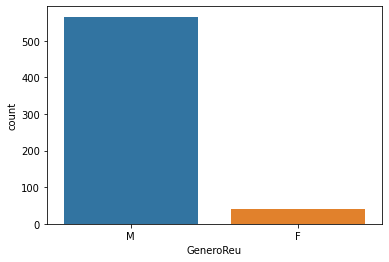

In [ ]:
ax = sns.countplot(y,label="Count")
M, F = y.value_counts()
print('Number of male defendants: ', M)
print('Number of female defendants : ', F)

In [ ]:
cols = [
        'Gênero (M 01, F 10)', 'Houve pena de RECLUSÃO? NAO (0), SIM (1)',
        'Houve pena de DETENÇÃO? SIM (1), NAO (0)',
        'Houve pena de MULTA? SIM (1) NAO (0)',
        'Regime inicial de cumprimento de pena (Aberto 001), (Semi-Aberto 010), (Fechado 100)',
        'A circunstância judicial da CULPABILIDADE foi valorada negativamente? SIM (1) NAO (0)',
        'A circunstância judicial dos ANTECEDENTES foi valorada negativamente? SIM (1) NAO (0)',
        'A circunstância judicial da CONDUTA SOCIAL foi valorada negativamente? SIM (1) NAO (0)',
        'A circunstância judicial da PERSONALIDADE foi valorada negativamente? SIM (1) NAO (0)',
        'A circunstância judicial dos MOTIVOS foi valorada negativamente? SIM (1) NAO (0)',
        'A circunstância judicial das CIRCUNSTÂNCIAS DO CRIME foi valorada negativamente? SIM (1) NAO (0)',
        'A circunstância judicial das CONSEQUÊNCIAS DO CRIME foi valorada negativamente? SIM (1) NAO (0)',
        'A circunstância judicial do COMPORTAMENTO DA VÍTIMA foi valorada negativamente? SIM (1) NAO (0)',
        'A pena-base foi aplicada no mínimo legal (privativa de liberdade)? SIM (1) NAO (0)',
        'Houve aplicação da circunstância agravante da reincidência? SIM (1) NAO (0)'
       ]

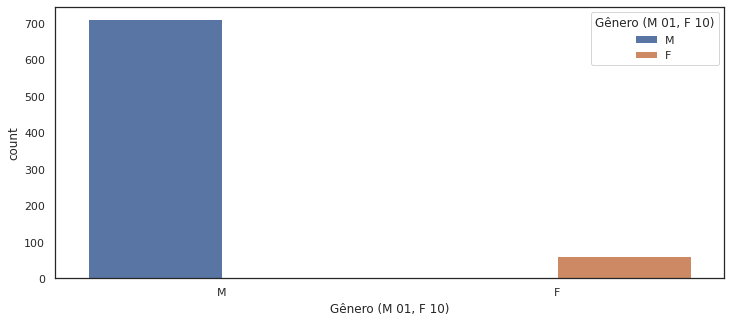

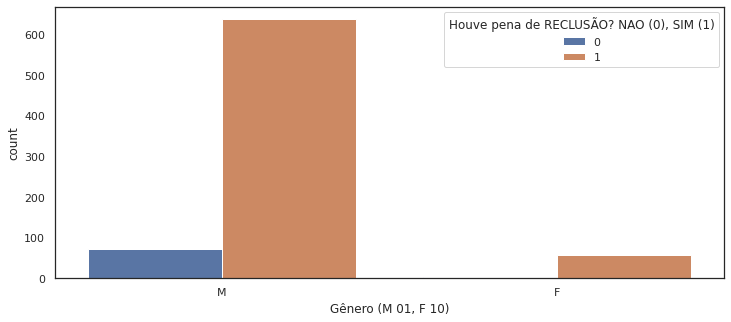

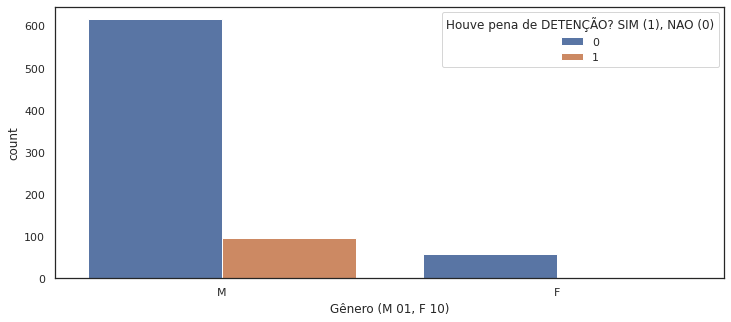

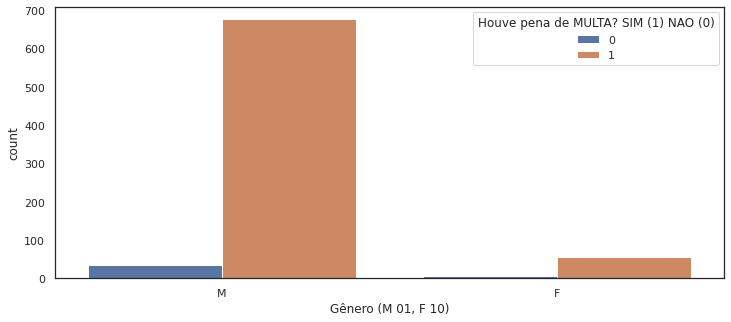

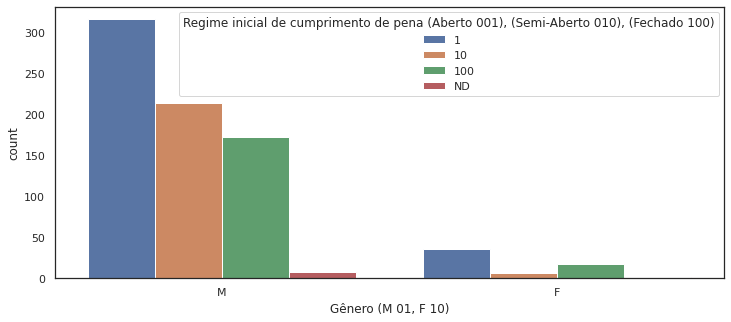

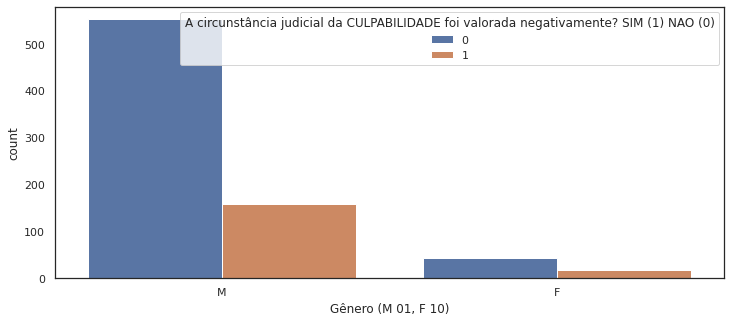

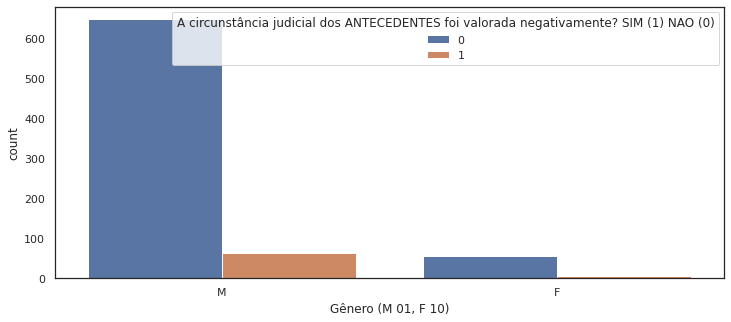

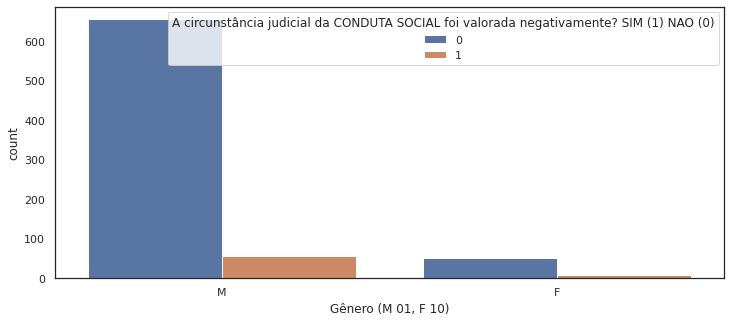

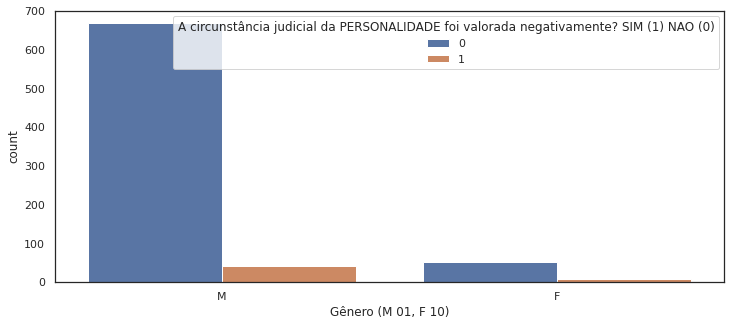

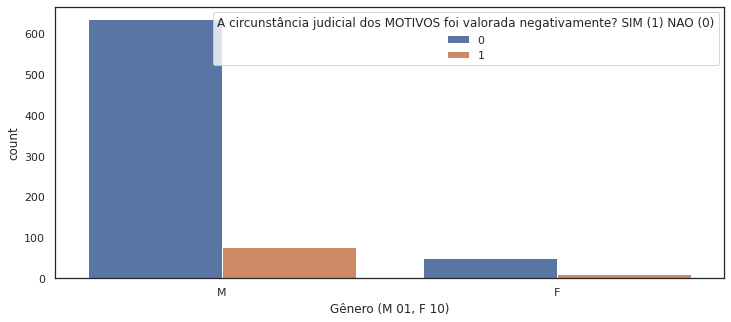

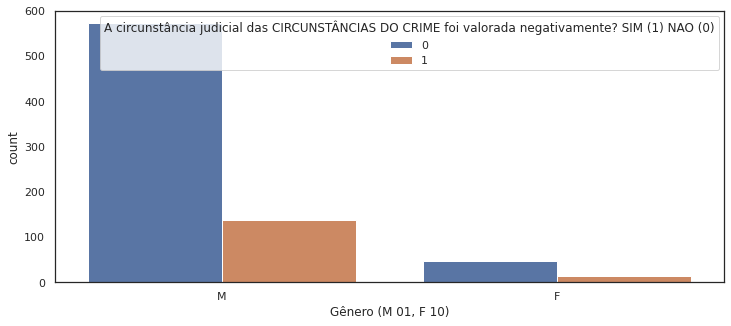

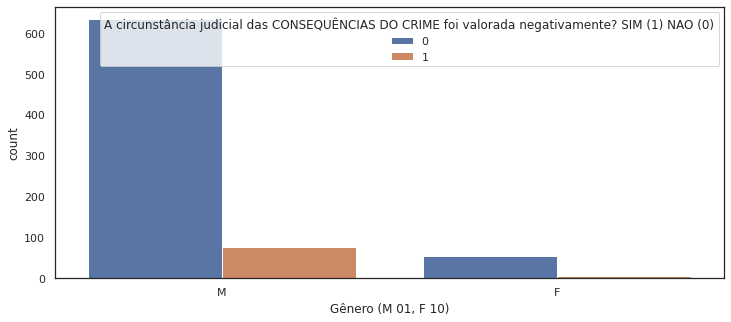

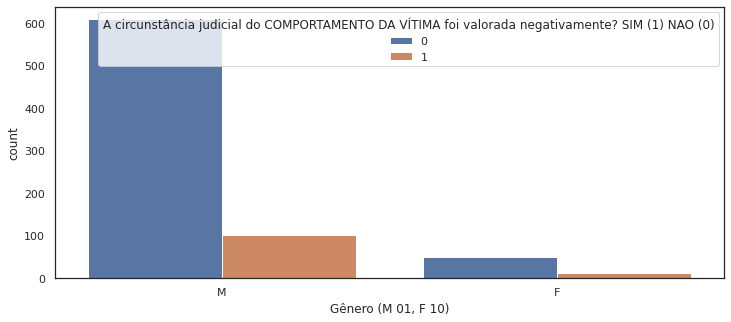

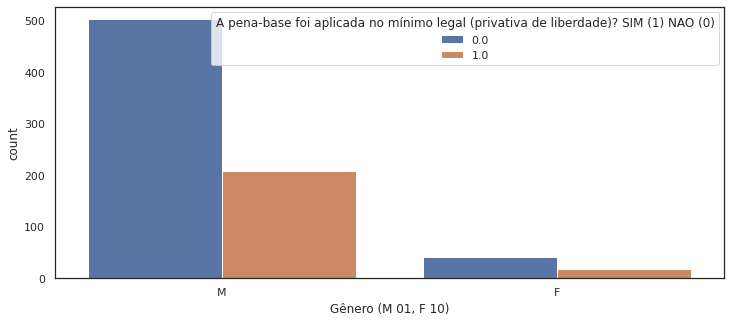

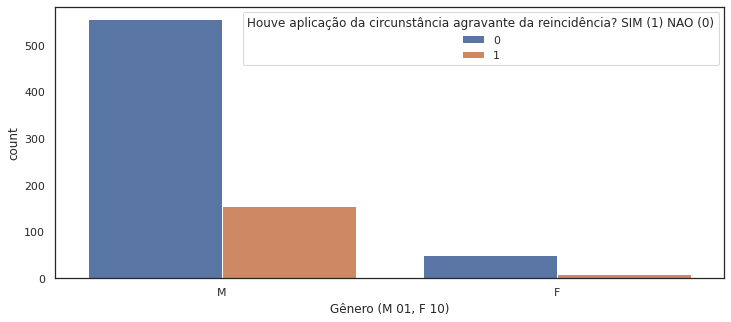

In [ ]:
fig_dims = (12, 5)
for col in cols:
  fig, ax = plt.subplots(figsize=fig_dims)
  sns.countplot(
    x="Gênero (M 01, F 10)", 
    hue=col, 
    data=df)

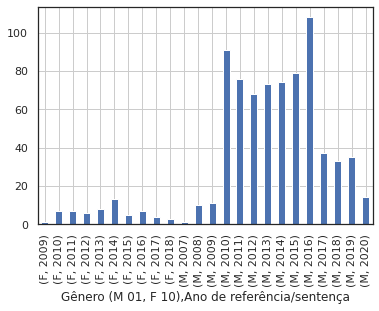

In [ ]:
df.groupby(['Gênero (M 01, F 10)', 'Ano de referência/sentença'])['Ano de referência/sentença'].count().plot.bar(grid=True)

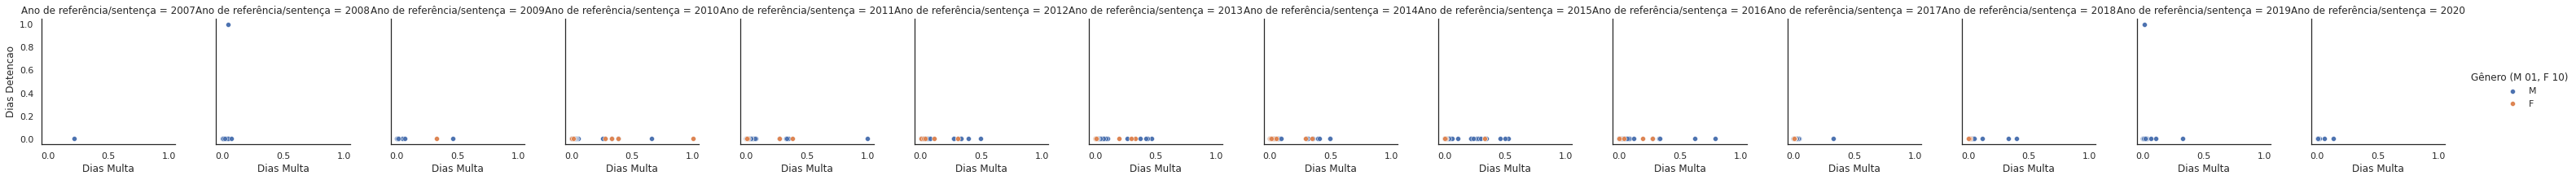

In [ ]:
g = sns.FacetGrid(df, col="Ano de referência/sentença", hue="Gênero (M 01, F 10)")
g.map_dataframe(sns.scatterplot, x="dias-multa (normalizado)", y="dias-detencao (normalizado)")
g.set_axis_labels("Dias Multa", "Dias Detencao")
g.add_legend()

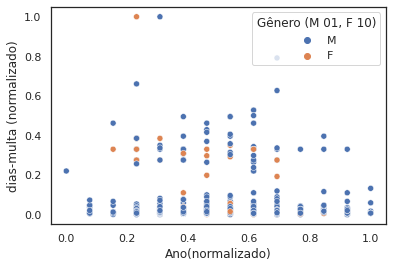

In [ ]:
sns.scatterplot(x=df['Ano(normalizado)'], 
                y=df['dias-multa (normalizado)'], 
                hue=df['Gênero (M 01, F 10)'])

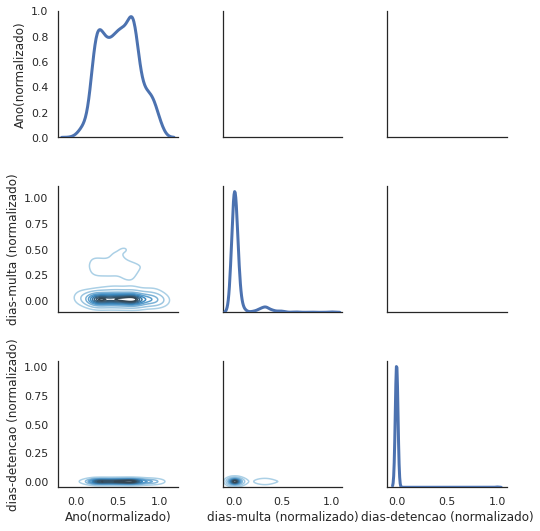

In [ ]:
sns.set(style="white")
xxx = df.loc[:, [
               'Ano(normalizado)', 
               'dias-multa (normalizado)', 
               'dias-detencao (normalizado)',
               ]].copy()
g = sns.PairGrid(xxx, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


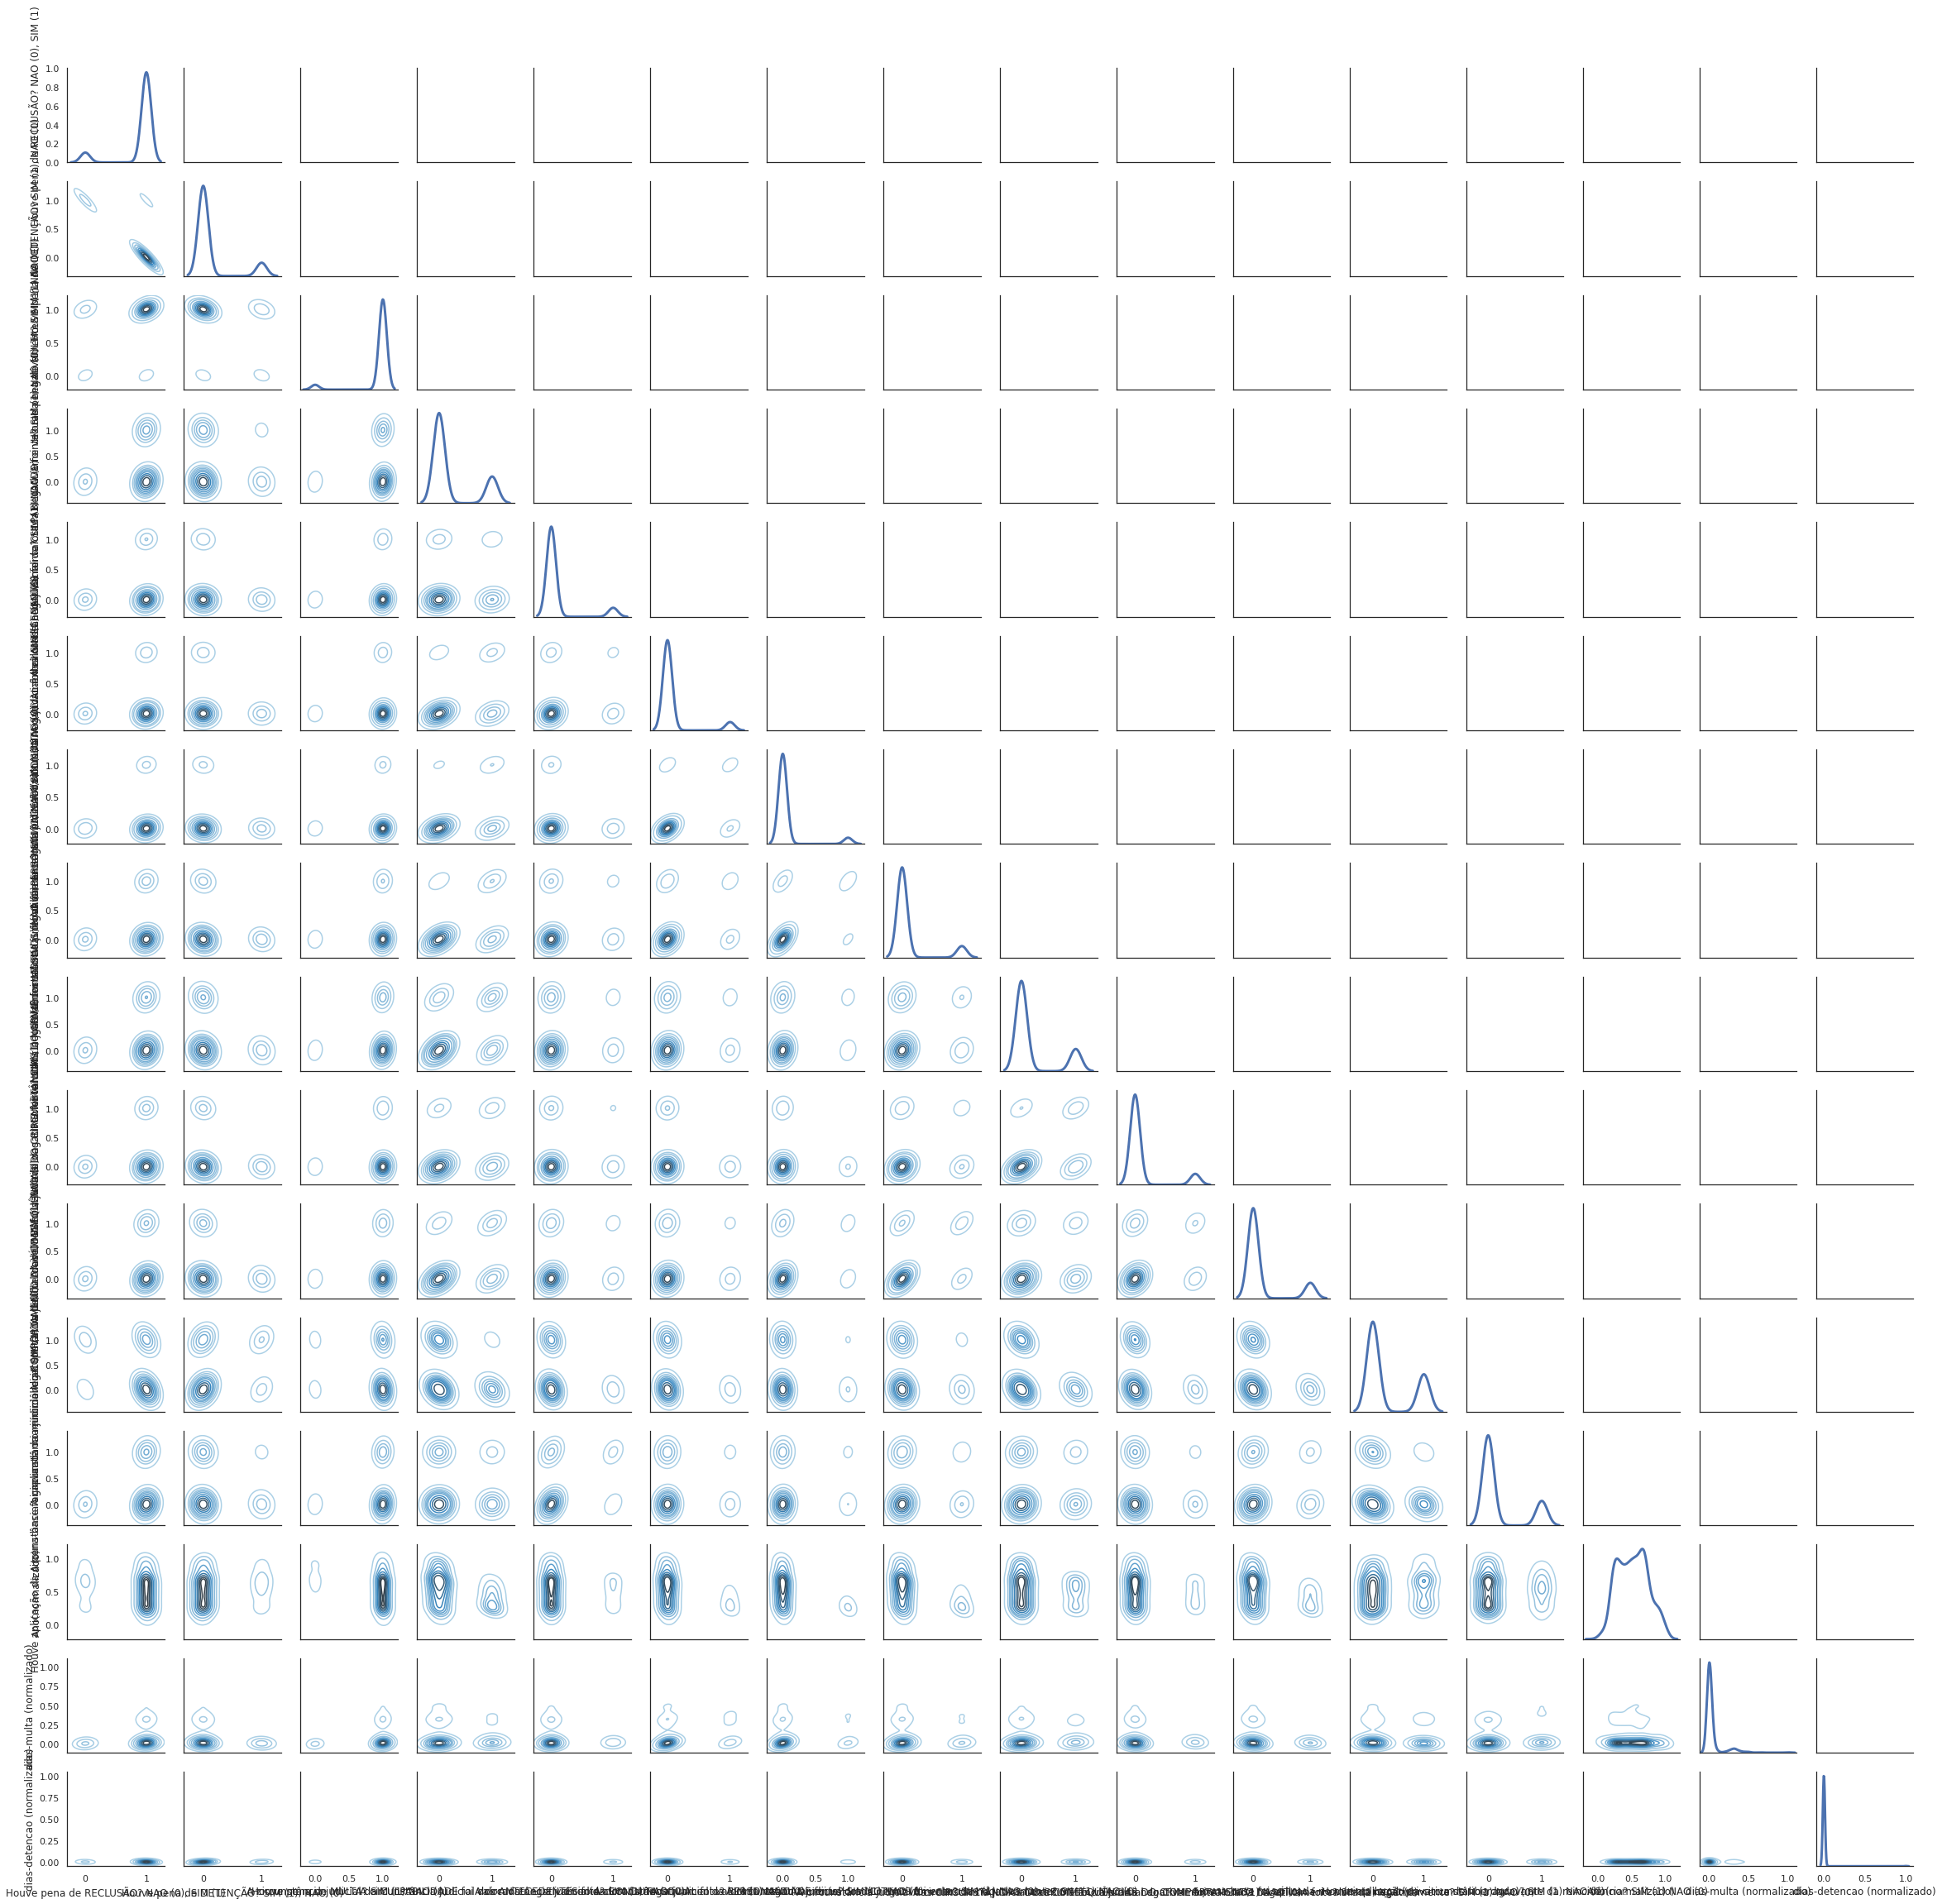

In [ ]:
sns.set(style="white")
df = x.loc[:]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

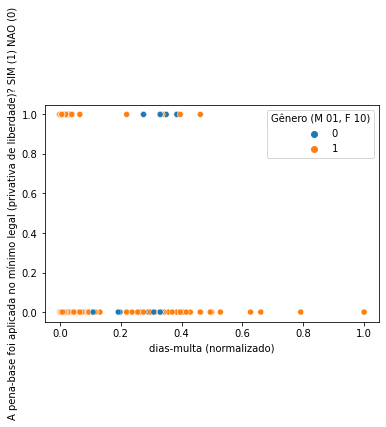

In [ ]:
sns.scatterplot(x=df['dias-multa (normalizado)'], 
                y=df['A pena-base foi aplicada no mínimo legal (privativa de liberdade)? SIM (1) NAO (0)'], 
                hue=df['Gênero (M 01, F 10)'])

In [ ]:
df.head()

,"Gênero (M 01, F 10)","Houve pena de RECLUSÃO? NAO (0), SIM (1)","Houve pena de DETENÇÃO? SIM (1), NAO (0)",Houve pena de MULTA? SIM (1) NAO (0),A circunstância judicial da CULPABILIDADE foi valorada negativamente? SIM (1) NAO (0),A circunstância judicial dos ANTECEDENTES foi valorada negativamente? SIM (1) NAO (0),A circunstância judicial da CONDUTA SOCIAL foi valorada negativamente? SIM (1) NAO (0),A circunstância judicial da PERSONALIDADE foi valorada negativamente? SIM (1) NAO (0),A circunstância judicial dos MOTIVOS foi valorada negativamente? SIM (1) NAO (0),A circunstância judicial das CIRCUNSTÂNCIAS DO CRIME foi valorada negativamente? SIM (1) NAO (0),A circunstância judicial das CONSEQUÊNCIAS DO CRIME foi valorada negativamente? SIM (1) NAO (0),A circunstância judicial do COMPORTAMENTO DA VÍTIMA foi valorada negativamente? SIM (1) NAO (0),A pena-base foi aplicada no mínimo legal (privativa de liberdade)? SIM (1) NAO (0),Houve aplicação da circunstância agravante da reincidência? SIM (1) NAO (0),Ano(normalizado),dias-multa (normalizado),dias-detencao (normalizado),"Regime inicial de cumprimento de pena (Aberto 001), (Semi-Aberto 010), (Fechado 100)_1","Regime inicial de cumprimento de pena (Aberto 001), (Semi-Aberto 010), (Fechado 100)_10","Regime inicial de cumprimento de pena (Aberto 001), (Semi-Aberto 010), (Fechado 100)_100"
0,1,0,1,0,0,0,0,0,0,0,0,0,1.0,0,0.230769,0.000000,0.001333,1,0,0
1,1,1,0,1,0,0,0,0,0,0,0,0,1.0,0,0.230769,0.008575,0.000000,1,0,0
2,1,0,1,1,1,0,0,0,0,0,0,0,1.0,0,0.230769,0.006596,0.000000,1,0,0
3,1,0,1,0,0,0,0,0,0,0,0,0,1.0,0,0.230769,0.000000,0.000000,1,0,0
4,1,0,1,1,1,0,0,0,0,0,0,0,0.0,0,0.230769,0.015831,0.000000,1,0,0


In [ ]:
df.drop([
         'Ano(normalizado)'         
         ], 
        axis=1, 
        inplace=True)

In [ ]:
df.drop([
         'dias-multa (normalizado)',
         'dias-detencao (normalizado)'      
         ], 
        axis=1, 
        inplace=True)

## ML Algorithms

### Train-Test split

In [ ]:
df['GeneroReu'] = df['GeneroReu'].replace('F', 0)
df['GeneroReu'] = df['GeneroReu'].replace('M', 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 180 to 881
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   GeneroReu                          606 non-null    int64  
 1   Reclusao                           606 non-null    int64  
 2   Detencao                           606 non-null    int64  
 3   DetencaoDias                       606 non-null    int64  
 4   Multa                              606 non-null    int64  
 5   CulpabCirc                         606 non-null    int64  
 6   AntecedCirc                        606 non-null    int64  
 7   CondSocialCirc                     606 non-null    int64  
 8   PersonCirc                         606 non-null    int64  
 9   MotivosCirc                        606 non-null    int64  
 10  CircCrimeCirc                      606 non-null    int64  
 11  ConseqCrimeCirc                    606 non-null    int64

In [ ]:
df.shape

(606, 30)

In [ ]:
X = df.drop('GeneroReu',axis=1).values
y = df['GeneroReu'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [ ]:
_, counts_elements_train = np.unique(y_train, return_counts=True)
_, counts_elements_test = np.unique(y_test, return_counts=True)

In [ ]:
counts_elements_train

array([ 32, 452])

In [ ]:
counts_elements_test

array([  8, 114])

### Applying KNN

Classify the field - Gênero (M 01, F 10)

#### Chosing the best K values

In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,6)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

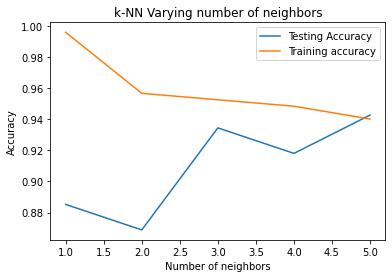

In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
### K = 6 seems to be the best option

#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_test,y_test)

0.9344262295081968

#### Confusion Matrix

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[  0,   8],
       [  0, 114]])

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,All
True,,
0,8,8
1,114,114
All,122,122


#### Classification Report

In [ ]:
#import classification_report
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.93      1.00      0.97       114

    accuracy                           0.93       122
   macro avg       0.47      0.50      0.48       122
weighted avg       0.87      0.93      0.90       122



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### ROC Curve



In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import roc_curve


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


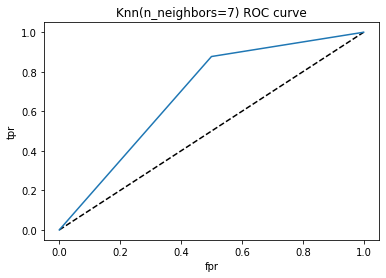

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.6885964912280702

#### Hyperparameter tuning



In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_neighbors':np.arange(1,50)}


In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
knn_cv.best_score_


0.9372984690421353

In [ ]:
knn_cv.best_params_


{'n_neighbors': 8}

### Naive Bayes

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 180 to 881
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   NumProc                            606 non-null    object 
 1   Reclusao                           606 non-null    int64  
 2   Detencao                           606 non-null    int64  
 3   DetencaoDias                       606 non-null    int64  
 4   Multa                              606 non-null    int64  
 5   CulpabCirc                         606 non-null    int64  
 6   AntecedCirc                        606 non-null    int64  
 7   CondSocialCirc                     606 non-null    int64  
 8   PersonCirc                         606 non-null    int64  
 9   MotivosCirc                        606 non-null    int64  
 10  CircCrimeCirc                      606 non-null    int64  
 11  ConseqCrimeCirc                    606 non-null    int64

#### Multinomial

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

#### Gaussian

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf = GaussianNB()

In [ ]:
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
clf.score(X_test,y_test)

0.2786885245901639

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 8,  0],
       [88, 26]])

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,8,0,8
1,88,26,114
All,96,26,122


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.08      1.00      0.15         8
           1       1.00      0.23      0.37       114

    accuracy                           0.28       122
   macro avg       0.54      0.61      0.26       122
weighted avg       0.94      0.28      0.36       122



### Decision Tree

In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
clf.score(X_test,y_test)

0.860655737704918

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[  3,   5],
       [ 12, 102]])

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,3,5,8
1,12,102,114
All,15,107,122


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.20      0.38      0.26         8
           1       0.95      0.89      0.92       114

    accuracy                           0.86       122
   macro avg       0.58      0.63      0.59       122
weighted avg       0.90      0.86      0.88       122

